In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
data_tracks = pd.read_csv("D:/DatasetsVault/spotify/tracks.csv")
data_artists = pd.read_csv("D:/DatasetsVault/spotify/artists.csv")

In [3]:
data_artists.rename(columns={"popularity":"art_popularity"}, inplace=True)
data_tracks.rename(columns={"popularity":"track_popularity"}, inplace=True)

In [4]:
data_artists.isna().sum()

id                 0
followers         11
genres             0
name               3
art_popularity     0
dtype: int64

In [5]:
data_artists.dropna(inplace=True)

In [6]:
data_tracks.isna().sum()

id                   0
name                71
track_popularity     0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
data_tracks.dropna(inplace=True)

In [8]:
data_tracks["id_artists"] = data_tracks["id_artists"].apply(literal_eval)

In [9]:
df01 = data_tracks.explode("id_artists")

In [10]:
data_artists.rename(columns={"id":"id_artists"}, inplace=True)

In [11]:
resultado = pd.merge(df01, data_artists, how="inner", on="id_artists")

In [12]:
df02 = pd.concat([resultado.select_dtypes(np.number), resultado.id], axis=1)

In [13]:
df03=df02.groupby('id').agg(
    {    
    "track_popularity":'sum',
    "duration_ms":"mean",
    "explicit":"max",
    "danceability":"mean",
    "energy":"mean",
    "key":pd.Series.mode,
    "loudness":"mean",
    "mode":"max",
    "speechiness":"mean",
    "acousticness":"mean",
    "instrumentalness":"mean",
    "liveness":"mean",
    "valence":"mean",
    "tempo":"mean",
    "time_signature":"max",
    "followers":'sum',
    "art_popularity":'sum'
    }
)

In [14]:
df03.to_csv("D:/DatasetsVault/spotify/mixed_df.csv")

In [15]:
df03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576125 entries, 0004Uy71ku11n3LMpuyf59 to 7zzuPsjj9L3M7ikqGmjN0D
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_popularity  576125 non-null  int64  
 1   duration_ms       576125 non-null  float64
 2   explicit          576125 non-null  int64  
 3   danceability      576125 non-null  float64
 4   energy            576125 non-null  float64
 5   key               576125 non-null  int64  
 6   loudness          576125 non-null  float64
 7   mode              576125 non-null  int64  
 8   speechiness       576125 non-null  float64
 9   acousticness      576125 non-null  float64
 10  instrumentalness  576125 non-null  float64
 11  liveness          576125 non-null  float64
 12  valence           576125 non-null  float64
 13  tempo             576125 non-null  float64
 14  time_signature    576125 non-null  int64  
 15  followers         576125 non-null  f

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='art_popularity', ylabel='track_popularity'>

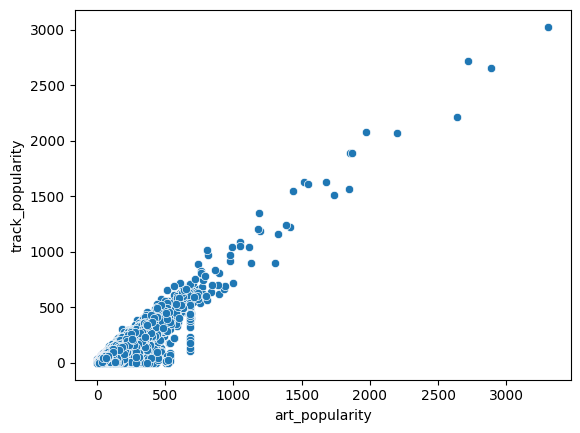

In [17]:
sns.scatterplot(data=df03, x="art_popularity", y="track_popularity")

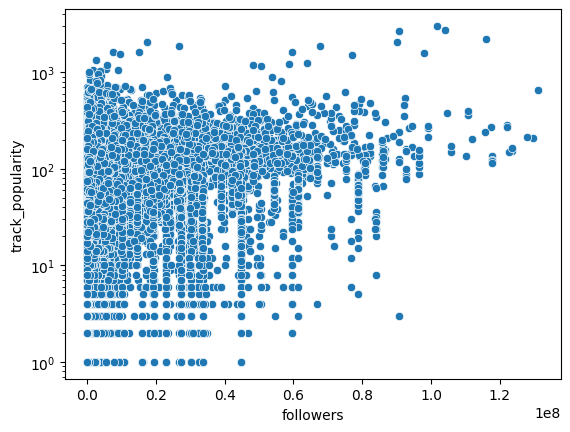

In [18]:
sns.scatterplot(data=df03, x="followers", y="track_popularity")
plt.yscale('log')

<Axes: xlabel='NewVariable02', ylabel='NewVariable01'>

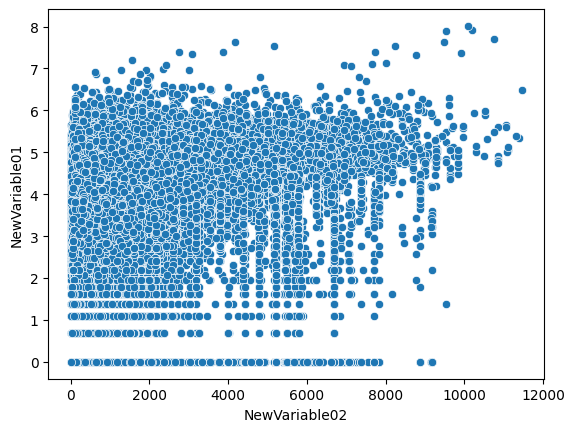

In [19]:
df03["NewVariable01"]=np.log(1+df03.track_popularity)
df03["NewVariable02"] = np.sqrt(df03.followers)
sns.scatterplot(data=df03, x="NewVariable02", y="NewVariable01")

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


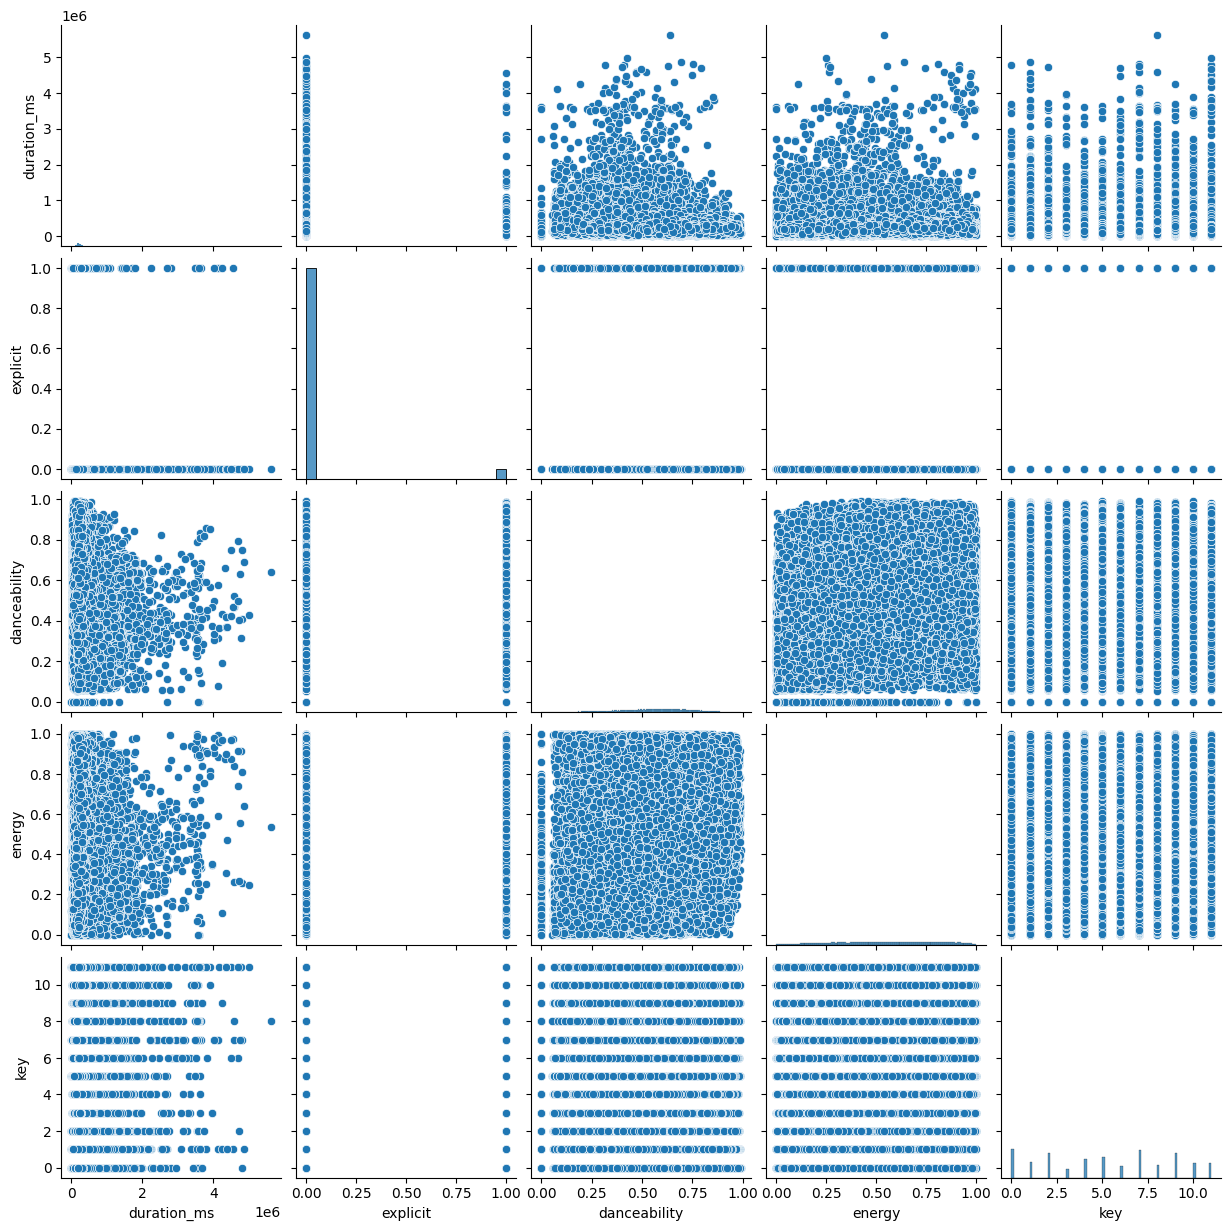

In [20]:
sns.pairplot(data=df03.iloc[:,[1,2,3,4,5]])